In [20]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
#%% Plot Tong's default setting
SMALL_SIZE  = 22
MEDIUM_SIZE = 22
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE, family='sans-serif', serif='Arial')          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels"
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('text')

# Example 01

In [21]:
polyorder = 5                               # Search space up to fifth order polynomials
usesine   = False                           # No trig functions
n         = 2                               # 2D system
A         = np.array([[-0.1, 2], [-2, -0.1]]) # Dynamics

def model_rhs(t, x, A):
    """ Linear model
    Returns:
        _type_: Return derivatives of linear model
    """
    return np.dot(A, x)

tspan  = list(np.arange(0, 25+0.01, 0.01)) # Time span
x0     = [2, 0]                            # Initial conditions

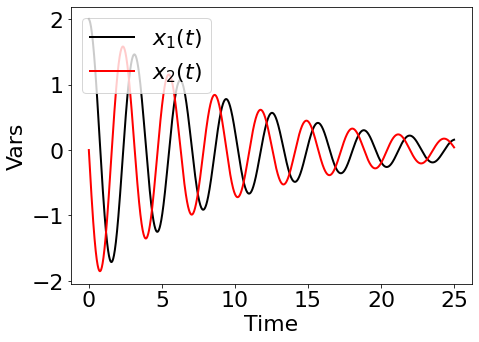

In [22]:
# Generate synthetic data for the method.


sol = solve_ivp(fun=lambda t, y: model_rhs(t,y,A), t_span=(0, 26), y0=x0, t_eval=tspan)
t_sim = sol.t
y_sim = sol.y

fig, ax = plt.subplots(1, 1, figsize=(7.2, 5.1))aa
ax.plot(tspan, y_sim[0, :], lw=2, label=r"$x_1(t)$", color="k")
ax.plot(tspan, y_sim[1, :], lw=2, label=r"$x_2(t)$", color="r")
ax.set_xlabel("Time"); ax.set_ylabel("Vars")
ax.legend(loc="upper left")


In [24]:
def add_noise(x, noise_magnitude=0.05):
    return x + noise_magnitude * np.random.random(size=x.shape)

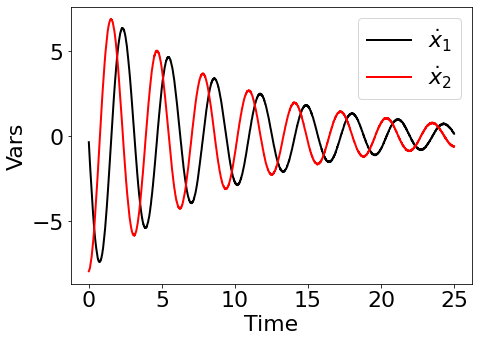

In [26]:
# Derivatives
xdot = model_rhs(None, y_sim, A)
xdot = xdot + add_noise(xdot, 0.05)

fig, ax = plt.subplots(1, 1, figsize=(7.2, 5.1))
ax.plot(tspan, xdot[0, :], lw=2, label=r"$\dot{x}_1$", color="k")
ax.plot(tspan, xdot[1, :], lw=2, label=r"$\dot{x}_2$", color="r")
ax.set_xlabel("Time"); ax.set_ylabel("Vars")
ax.legend(loc="upper right")


In [34]:
xin = y_sim.copy().T

num_times, num_vars = xin.shape
first = np.ones((num_times, num_vars * num_vars))

xxxx = np.dot(xin.T, first)


In [50]:
import sympy as sym
xx = sym.Symbol('x')
yy = sym.Symbol('y')

first = np.ones((1, 2 * 2))
xinn = np.array([[xx, yy]])

xxxx = np.dot( np.dot(xinn.T, first).T, xinn.T)
xxxx

array([[1.0*x**2 + 1.0*y**2],
       [1.0*x**2 + 1.0*y**2],
       [1.0*x**2 + 1.0*y**2],
       [1.0*x**2 + 1.0*y**2]], dtype=object)

In [49]:
xinn.shape

(1, 2)

In [ ]:
# create vector with possible terms that we're going to identify
 # - function yout = poolData(yin, nVars, polyorder, usesine) -

def create_candidates(xin, poly_order_max, usesine=False):

    theta = np.full(shape=list(xin.shape)+poly_order_max)
